# `numpy` practice

In [108]:
import numpy as np

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

In [193]:
# Task 1

# 6. Create a null vector of size 10 but the fifth value which is 1
a = np.zeros(10)
a[4] = 1
print(a)

# 8. Reverse a vector (first element becomes last)
b = np.arange(9)
b = b[::-1]
print(b)

# 9. Create a 3x3 matrix with values ranging from 0 to 8
c = np.arange(9).reshape(3, 3)
print(c)

# 19. Create a 8x8 matrix and fill it with a checkerboard pattern
d = np.zeros((8, 8))
d[::2, 1::2] = 1
d[1::2, ::2] = 1
print(d)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[8 7 6 5 4 3 2 1 0]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


In [192]:
# Task 2
# 44. Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

np.random.seed(1234)
z = np.random.random(size=20).reshape(10, 2)
x, y = z[:,0], z[:,1]
r = np.hypot(x, y)
#phi = np.arctan2(y, x)*180/np.pi # в градусах
phi = np.arctan2(y, x) # в радианах
print(r)
print(phi)

[0.65092167 0.89910716 0.82623785 0.84819306 1.29818681 0.61565357
 0.98745418 0.67232937 0.50327154 1.17316515]
[1.27214855 1.06231974 0.3362191  1.23878522 0.74060617 0.95059494
 0.80633754 0.98759553 0.02736131 0.85163559]


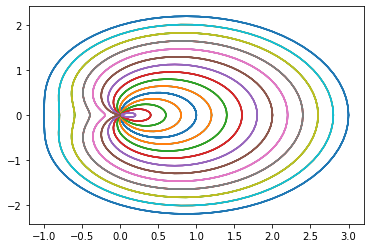

In [111]:
# Task 3

import matplotlib.pyplot as plt

phi = np.linspace(-2*np.pi, 2*np.pi, 201)
a = np.linspace(-2, 2, 21)

phi = phi[phi != 0]
for a_k in a:
    r = a_k + np.cos(phi)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y)
plt.show()

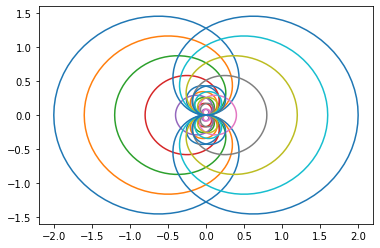

In [112]:
# Task 4

import matplotlib.pyplot as plt

phi = np.linspace(-2*np.pi, 2*np.pi, 201)
a = np.linspace(-2, 2, 11)
phi = np.where(phi != 0, phi, 0)

for a_k in a:
    r = a_k * np.sin(phi) / phi
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y)
plt.show()

In [113]:
# Task 5
# explicit broadcasting

u = np.arange(4)
v = u + 0.5
u = u[:, None]
v = v[None, :]
c = 1./(u - v)
c

array([[-2.        , -0.66666667, -0.4       , -0.28571429],
       [ 2.        , -2.        , -0.66666667, -0.4       ],
       [ 0.66666667,  2.        , -2.        , -0.66666667],
       [ 0.4       ,  0.66666667,  2.        , -2.        ]])

In [114]:
# subtract.outer attribute

u1 = np.arange(4)
v1 = u1 + 0.5
1. / np.subtract.outer(u1, v1)

array([[-2.        , -0.66666667, -0.4       , -0.28571429],
       [ 2.        , -2.        , -0.66666667, -0.4       ],
       [ 0.66666667,  2.        , -2.        , -0.66666667],
       [ 0.4       ,  0.66666667,  2.        , -2.        ]])

In [189]:
# Task 6
# part1
M1_mean = 40e4
M1_std = 500
M2_mean = 30e4
M2_std = 1000
r_mean = 3.2
r_std = 0.01
G = 6.67384e-11
F_mean = G * M1_mean * M2_mean / r_mean**2

# F_std = pow((M1_std * dF/dM1)**2 + (M2_std * dF/dM2)**2 + (r_std * dF/dr)**2, 0.5)

F_std = pow(M1_std**2 * (G * M2_mean / r_mean**2)**2 + \
            M2_std**2 * (G * M1_mean / r_mean**2)**2 + \
            r_std**2 * (-2 * G * M1_mean * M2_mean / r_mean**3)**2, 0.5)
print('F =', F_mean, '+-', F_std)

F = 0.7820906249999999 +- 0.005625407272639265


In [190]:
np.random.seed(1234)
M1 = np.random.normal(M1_mean, M1_std, size=1000000) #распределение Гаусса
M2 = np.random.normal(M2_mean, M2_std, size=1000000)
r = np.random.normal(r_mean, r_std, size=1000000)

F = G * M1 * M2 / r**2
print('F =', F.mean(), '+-', F.std())

F = 0.7821118882691668 +- 0.0056331391835191145


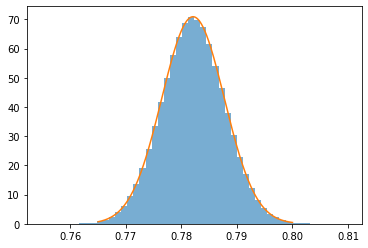

In [191]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(0.765, 0.8, 0.0001)

fig, axs = plt.subplots()
axs.hist(F, bins=50, alpha=0.6, density = True)
axs.plot(x, norm.pdf(x, F_mean, F_std))

In [141]:
# Task 6
# part2

M1_mean = 40e4
M1_std = 2e4
M2_mean = 30e4
M2_std = 1e5
r_mean = 3.2
r_std = 1
G = 6.67384e-11
F_mean = G * M1_mean * M2_mean / r_mean**2

# F_std = pow((M1_std * dF/dM1)**2 + (M2_std * dF/dM2)**2 + (r_std * dF/dr)**2, 0.5)

F_std = pow(M1_std**2 * (G * M2_mean / r_mean**2)**2 + \
            M2_std**2 * (G * M1_mean / r_mean**2)**2 + \
            r_std**2 * (-2 * G * M1_mean * M2_mean / r_mean**3)**2, 0.5)
print('F =', F_mean, '+-', F_std)

F = 0.7820906249999999 +- 0.5553593043410235


In [184]:
np.random.seed(1234)
M1 = np.random.normal(M1_mean, M1_std, size=1000000) #распределение Гаусса
M2 = np.random.normal(M2_mean, M2_std, size=1000000)
r = np.random.normal(r_mean, r_std, size=1000000)

F = G * M1 * M2 / r**2
print('F =', F.mean(), '+-', F.std())

F = 159.35756731464411 +- 72852.99726478117


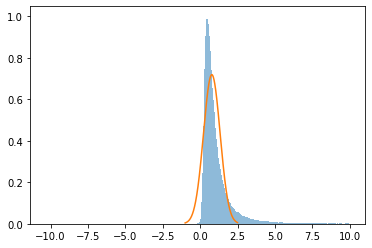

In [187]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(-1, 2.5, 0.0001)

fig, axs = plt.subplots()
axs.hist(F[F<10], bins=1000, alpha=0.5, density = True)
axs.plot(x, norm.pdf(x, F_mean, F_std))